In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


## Read training data

In [2]:
df = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/3DFS-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 159 entries, ID to original_ngtdm_Strength
dtypes: float64(102), int64(56), object(1)
memory usage: 416.3+ KB


In [3]:
df.head()

,ID,patient,3yDFS,cli01,cli02,cli03,cli04,cli05,cli06,cli07,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3,SICK0000053,0,1,41,2,1,0,2,3,...,0.005932,0.004502,0.892413,634.309034,0.004174,0.025478,0.034650,1651.539734,0.111554,35.270325
1,19,SICK0006140,0,1,40,1,1,0,1,0,...,0.013557,0.008920,0.851541,793.356047,0.008007,0.013646,0.044393,2273.786349,0.092157,92.240806
2,25,SICK0007137,1,1,39,1,1,0,2,1,...,0.014492,0.006806,0.890508,818.959013,0.004908,0.022152,0.026248,2910.847233,0.107077,60.080551
3,26,SICK0007154,1,2,45,2,1,0,2,1,...,0.002476,0.001838,0.822249,1366.279301,0.001703,0.020552,0.039183,628.267495,0.086383,26.964163
4,27,SICK0007192,1,1,55,2,1,0,2,0,...,0.038111,0.017261,0.845525,763.166227,0.012497,0.017526,0.050475,1352.372555,0.118779,60.753588


In [4]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['3yDFS']))}
class_mapping

{0: 0, 1: 1}

In [5]:
from sklearn.preprocessing import LabelEncoder
df['3yDFS'] = df['3yDFS'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['3yDFS'].values)
X0_train = df.iloc[:, 3:56].values
X1_train = df.iloc[:, 56:159].values
print(y_train.shape)
print(X0_train.shape)
print(X1_train.shape)

(335,)
(335, 53)
(335, 103)


In [6]:
feat_labels0 = df.columns[3:56] 
feat_labels1 = df.columns[56:159] 

## Read test data

In [7]:
df1 = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/3DFS-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['3yDFS']))}
df1['3yDFS'] = df1['3yDFS'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['3yDFS'].values)
X0_test = df1.iloc[:, 3:56].values
X1_test = df1.iloc[:, 56:159].values
print(y_test.shape)
print(X0_test.shape)
print(X1_test.shape)

(40,)
(40, 53)
(40, 103)


In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X0_std = stdsc.fit_transform(X0_train)
X0_train = X0_std
X0_test = stdsc.transform(X0_test)
print(X0_train.shape)
print(X0_test.shape)

(335, 53)
(40, 53)


In [9]:
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1_train)
X1_train = X1_std
X1_test = stdsc.transform(X1_test)
print(X1_train.shape)
print(X1_test.shape)

(335, 103)
(40, 103)


1    273
0     62
Name: 3yDFS, dtype: int64


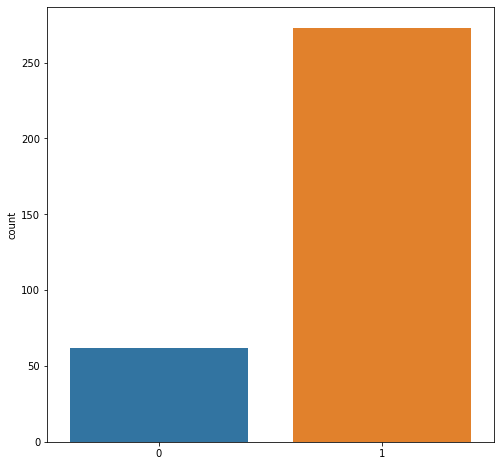

In [10]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
ax = sns.countplot(x=y_train, data=df) 
print(df['3yDFS'].value_counts())

0    21
1    19
Name: 3yDFS, dtype: int64


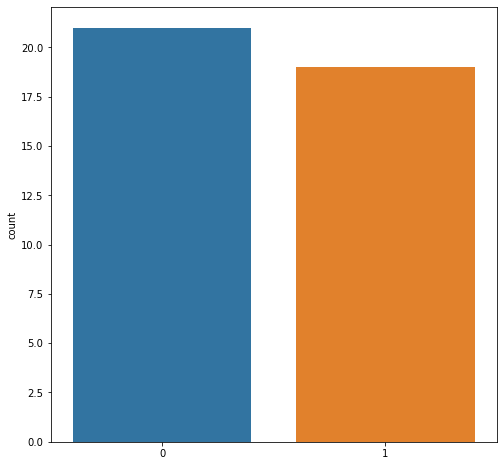

In [11]:
import seaborn as sns
ax = sns.countplot(x=y_test, data=df1)
print(df1['3yDFS'].value_counts())

## Data preprocessing

### Clinical features

In [12]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X00_train, y00_train = sm.fit_sample(X0_train, y_train)

Using TensorFlow backend.


In [13]:
unique, count = np.unique(y00_train, return_counts=True)
y00_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y00_train_smote_value_count

{0: 199, 1: 273}

In [14]:
print(y00_train.shape)
print(X00_train.shape)

(472,)
(472, 53)


In [15]:
new_df = pd.DataFrame(X00_train)
new_df1 = pd.DataFrame(y00_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.451025,-0.810826,-0.082606,0.319333,-0.485965,0.148660,2.377121,0.000000,3.377485,0.135045,...,0.689761,1.449776,-2.281163,-0.946733,0.206475,1.532971,-1.158731,-0.879782,-0.130098,-1.021838
1,-0.451025,-0.904815,-1.539072,0.319333,-0.485965,-1.197318,-0.758058,-1.514767,-0.296078,0.135045,...,0.689761,-0.689761,0.438373,-0.946733,1.139615,1.532971,-1.158731,-1.213834,-0.712694,-0.735598
2,-0.451025,-0.998803,-1.539072,0.319333,-0.485965,0.148660,0.287002,0.000000,-0.296078,0.135045,...,-1.449776,-0.689761,-2.281163,0.353085,-1.893091,1.532971,0.863013,0.643493,0.131324,0.292095
3,1.537045,-0.434872,-0.082606,0.319333,-0.485965,0.148660,0.287002,0.000000,-0.296078,0.135045,...,-1.449776,-0.689761,-2.281163,1.652902,-0.026810,-0.652328,-1.158731,1.071079,2.962145,-1.469925
4,-0.451025,0.505013,-0.082606,0.319333,-0.485965,0.148660,-0.758058,0.000000,-0.296078,0.135045,...,0.689761,1.449776,0.438373,-0.946733,-1.076593,-0.652328,0.863013,1.512027,-0.040467,1.491184


### Radiomics features

In [16]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X11_train, y11_train = sm.fit_sample(X1_train, y_train)

In [17]:
unique, count = np.unique(y00_train, return_counts=True)
y11_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y11_train_smote_value_count

{0: 199, 1: 273}

In [18]:
print(y11_train.shape)
print(X11_train.shape)

(546,)
(546, 103)


In [19]:
new_df = pd.DataFrame(X11_train)
new_df1 = pd.DataFrame(y11_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,-1.298675,-0.080788,-0.044711,-0.809224,-0.158412,-0.158412,-0.654052,-0.828373,0.516495,-0.671408,...,-0.314936,-0.385441,1.047621,-0.602285,-0.434347,0.402477,-0.500026,-0.360162,-0.362746,-0.854252
1,1.065190,0.430074,0.437737,1.270784,0.546063,0.546063,0.795271,1.422049,-0.760905,0.777868,...,-0.262059,-0.234236,-0.204587,-0.217705,-0.168885,-0.588507,0.227706,0.077379,-0.696712,0.846160
2,-0.600742,0.436611,0.430315,0.438781,0.464135,0.464135,0.695474,0.139751,-0.774445,0.717019,...,-0.255578,-0.306575,0.989236,-0.155797,-0.383551,0.123881,-1.127643,0.525337,-0.439829,-0.113735
3,-0.787715,0.361876,0.252180,0.126780,0.442132,0.442132,0.536706,-0.075992,-0.667046,0.557135,...,-0.338894,-0.476594,-1.101986,1.167639,-0.605478,-0.010071,-0.161452,-1.079690,-0.796121,-1.102168
4,1.141083,0.227764,-0.044711,1.374785,0.172720,0.172720,0.413094,1.195945,-0.614255,0.448447,...,-0.091803,0.051218,-0.388880,-0.290705,0.142047,-0.263545,0.682049,-0.570526,-0.238351,-0.093647


## Feature Selection

Accuracy: 100.00 % 


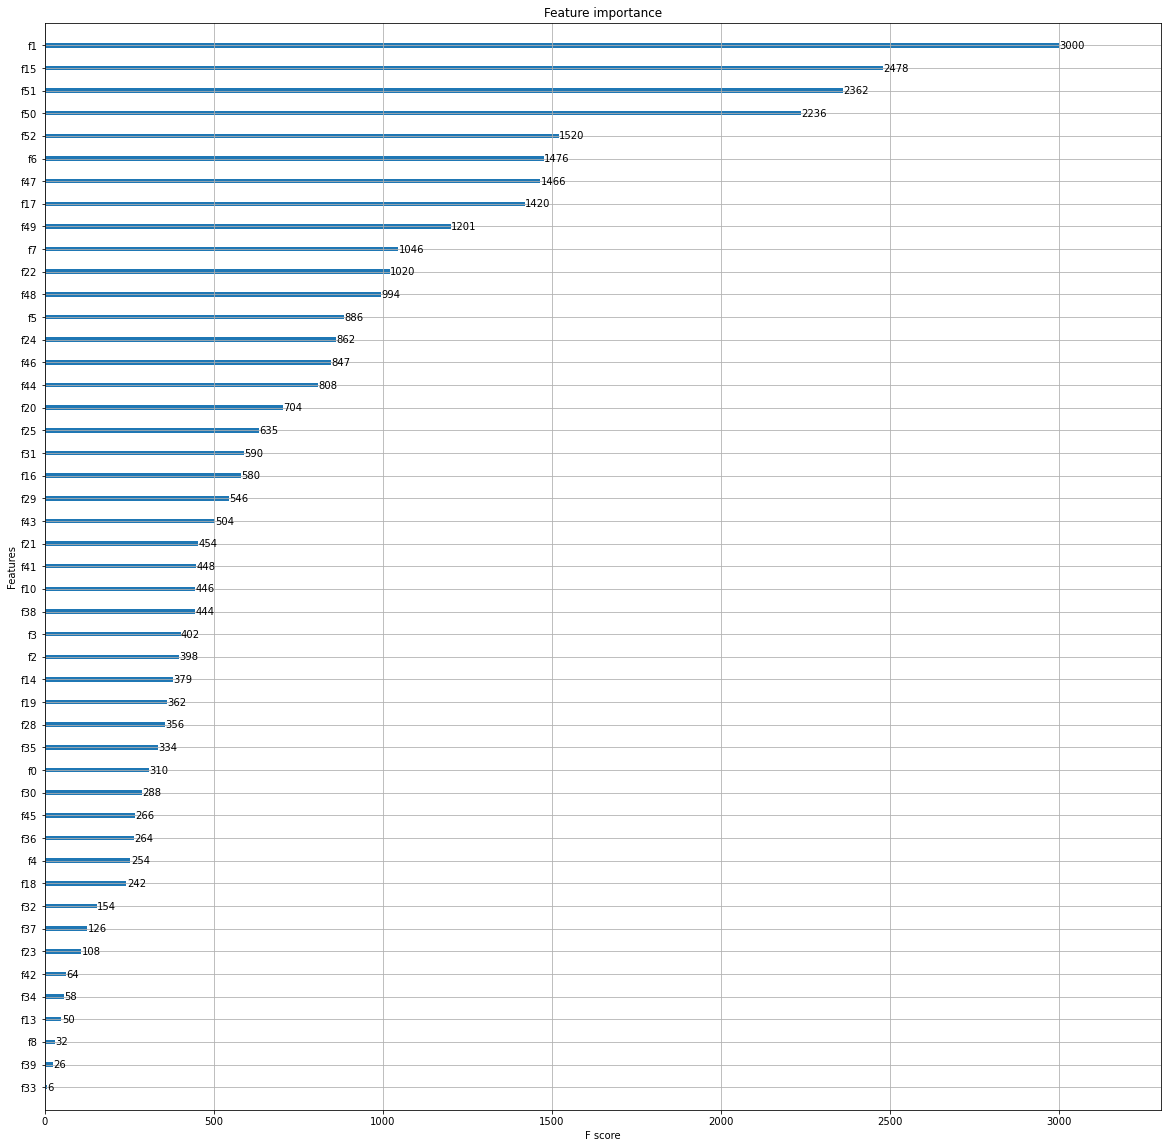

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X00_train, y00_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X00_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y00_train)):
    if ans[i] == y00_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

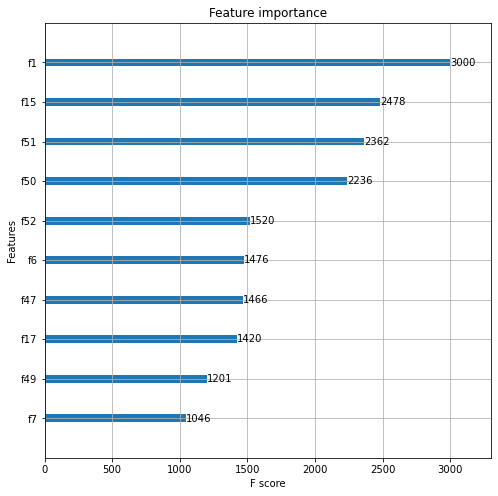

In [21]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('3DFS-1.jpg',dpi=1200)

In [22]:
feat_labels0[[1,15,51,50,52,6,47,17,49,7]]

Index(['cli02', 'cli16', 'cli52', 'cli51', 'cli53', 'cli07', 'cli48', 'cli18',
       'cli50', 'cli08'],
      dtype='object')

Accuracy: 100.00 % 


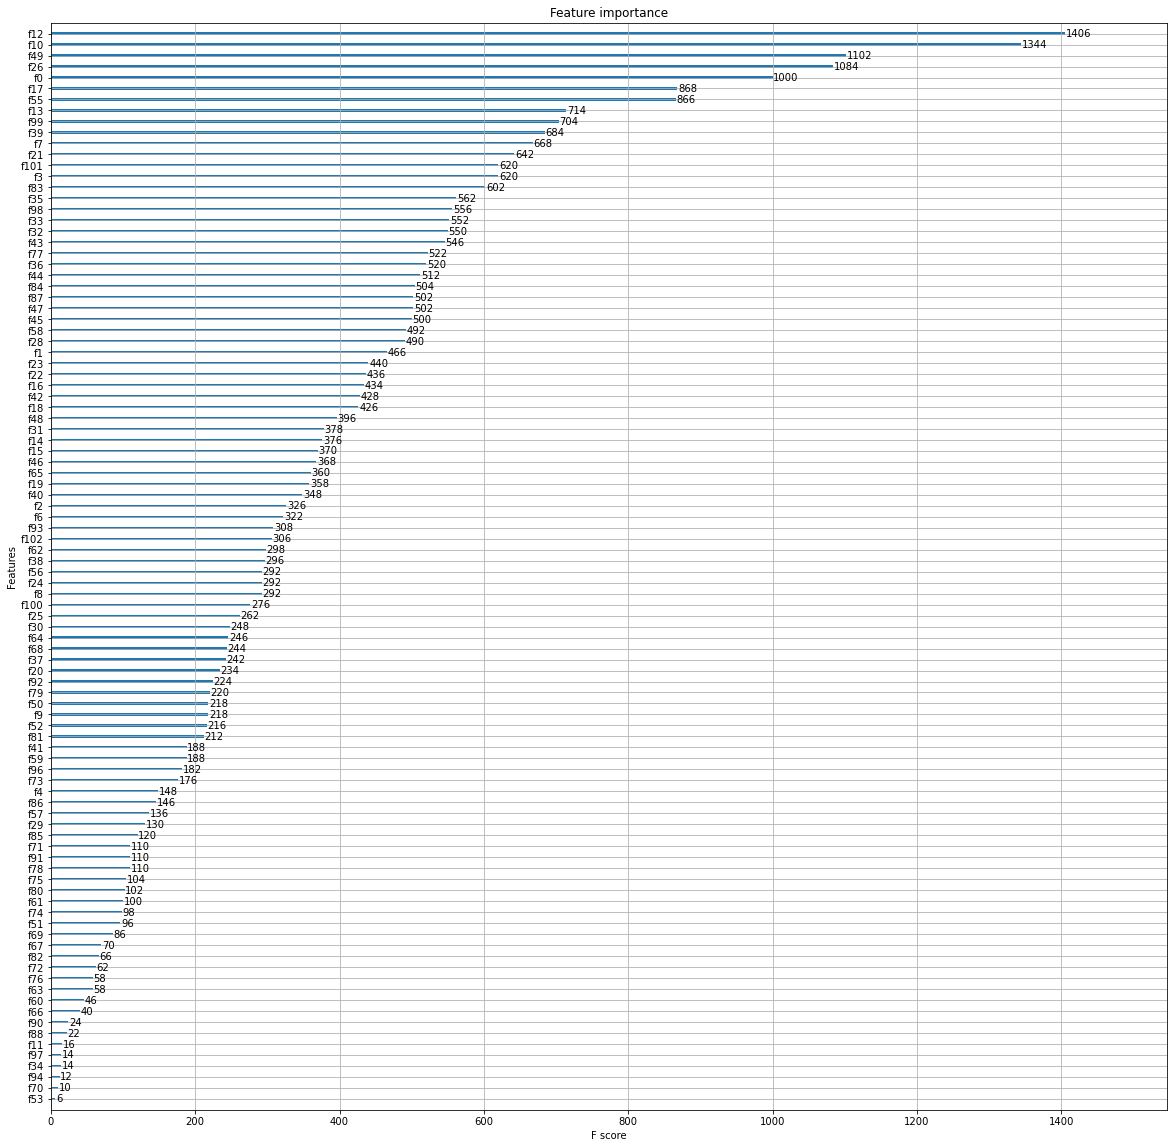

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X11_train, y11_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X11_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y11_train)):
    if ans[i] == y11_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

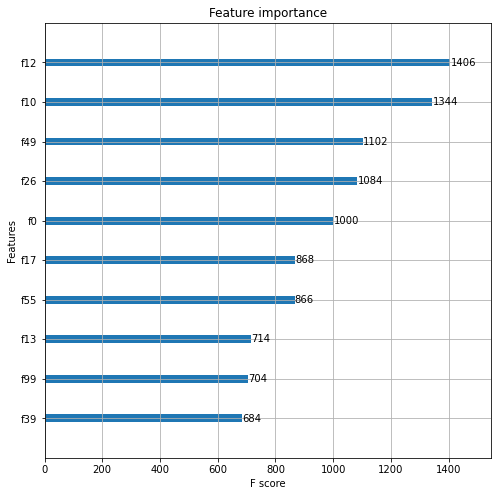

In [24]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('3DFS-2.jpg',dpi=1200)

In [25]:
feat_labels1[[12,10,49,26,0,17,55,13,99,39]]

Index(['original_firstorder_10Percentile', 'original_shape_SurfaceVolumeRatio',
       'original_glcm_MaximumProbability', 'original_firstorder_Skewness',
       'original_shape_Elongation', 'original_firstorder_Kurtosis',
       'original_glrlm_HighGrayLevelRunEmphasis',
       'original_firstorder_90Percentile', 'original_ngtdm_Coarseness',
       'original_glcm_DifferenceVariance'],
      dtype='object')

In [26]:
X0 = X00_train[:,[1,15,51,50,52,6,47,17,49,7]]
X1 = X11_train[:,[12,10,49,26,0,17,55,13,99,39]]
X2 = X0_test[:,[1,15,51,50,52,6,47,17,49,7]]
X3 = X1_test[:,[12,10,49,26,0,17,55,13,99,39]]
y0 = y00_train
y1 = y11_train
y2 = y_test
y3 = y_test

print("the training clinical data:")
print(X0.shape)
print(y0.shape)
print("the training radiomics data:")
print(X1.shape) #
print(y1.shape)
print("the test clinical data:")
print(X2.shape) #
print(y2.shape)
print("the test radiomics data:")
print(X3.shape) #
print(y3.shape)

the training clinical data:
(472, 10)
(472,)
the training radiomics data:
(546, 10)
(546,)
the test clinical data:
(40, 10)
(40,)
the test radiomics data:
(40, 10)
(40,)


## Select modeling method

In [27]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

### Clinical signature

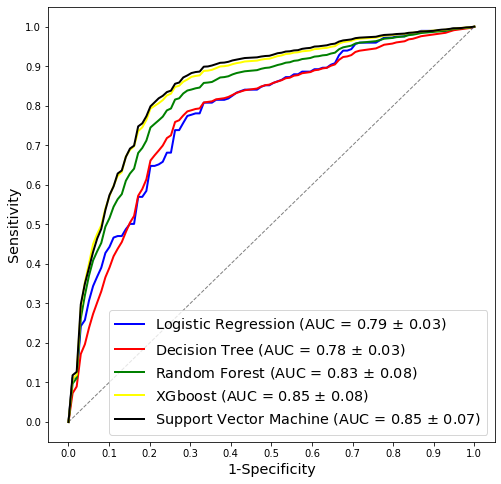

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X0, y0):
    probas_ = clf1.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X0, y0):
    probas_ = clf2.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X0, y0):
    probas_ = clf3.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf4.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf5.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('3DFS-3.jpg',dpi=1200)
plt.show()

### Radiomics signature

In [29]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

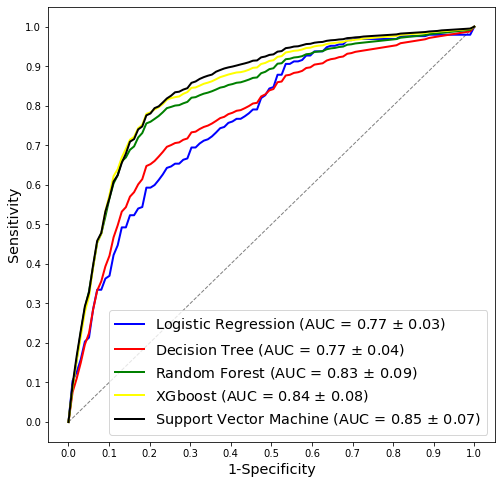

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X1, y1):
    probas_ = clf1.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X1, y1):
    probas_ = clf2.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X1, y1):
    probas_ = clf3.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf4.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf5.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('3DFS-4.jpg',dpi=1200)
plt.show()

## Modeling & Validation

### Clinical Score

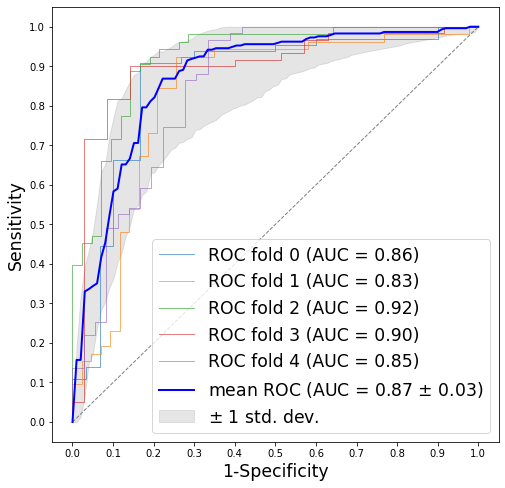

In [31]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X0, y0):
    probas_ = model.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

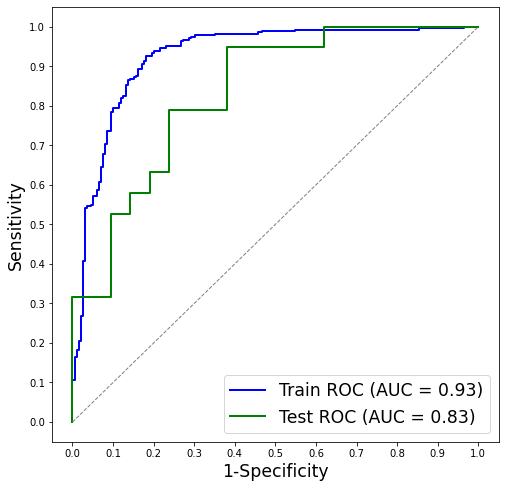

In [32]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X2)
fpr, tpr, thresholds = roc_curve(y2, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('3DFS-5.jpg',dpi=1200)
plt.show()

In [33]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df['3yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,46,29
1,16,244


In [34]:
Y2_Pred = model.predict(X2)
pd.crosstab(pd.Series(Y2_Pred, name = 'Predicted'), 
            pd.Series(df1['3yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,13,1
1,8,18


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.8686440677966102
Precision =  0.8808664259927798
Recall =  0.8937728937728938
F1 Score =  0.8872727272727273


In [36]:
print("Accuracy = " , accuracy_score(y2, Y2_Pred))
print("Precision = " ,precision_score(y2, Y2_Pred))
print("Recall = " ,recall_score(y2, Y2_Pred))
print("F1 Score = " ,f1_score(y2, Y2_Pred))

Accuracy =  0.775
Precision =  0.6923076923076923
Recall =  0.9473684210526315
F1 Score =  0.7999999999999999


In [37]:
predictions = model.predict_proba(X0)
predictions

array([[0.72052789, 0.27947211],
       [0.06407909, 0.93592091],
       [0.11177005, 0.88822995],
       [0.51005969, 0.48994031],
       [0.06372619, 0.93627381],
       [0.22591174, 0.77408826],
       [0.12141697, 0.87858303],
       [0.49006042, 0.50993958],
       [0.10376049, 0.89623951],
       [0.11179249, 0.88820751],
       [0.84874821, 0.15125179],
       [0.83137657, 0.16862343],
       [0.34614983, 0.65385017],
       [0.07140631, 0.92859369],
       [0.10236999, 0.89763001],
       [0.06264652, 0.93735348],
       [0.70278807, 0.29721193],
       [0.29500713, 0.70499287],
       [0.0899431 , 0.9100569 ],
       [0.51661151, 0.48338849],
       [0.82754807, 0.17245193],
       [0.16582138, 0.83417862],
       [0.10857881, 0.89142119],
       [0.84472331, 0.15527669],
       [0.11182148, 0.88817852],
       [0.85424768, 0.14575232],
       [0.17075134, 0.82924866],
       [0.11172916, 0.88827084],
       [0.07364803, 0.92635197],
       [0.04958252, 0.95041748],
       [0.

In [38]:
predictions1 = model.predict_proba(X2)
predictions1

array([[0.26723998, 0.73276002],
       [0.09761   , 0.90239   ],
       [0.05720104, 0.94279896],
       [0.03495835, 0.96504165],
       [0.03982432, 0.96017568],
       [0.23950721, 0.76049279],
       [0.19962542, 0.80037458],
       [0.10105771, 0.89894229],
       [0.09577621, 0.90422379],
       [0.76600799, 0.23399201],
       [0.04394873, 0.95605127],
       [0.43147907, 0.56852093],
       [0.13816704, 0.86183296],
       [0.05460658, 0.94539342],
       [0.08555565, 0.91444435],
       [0.42993051, 0.57006949],
       [0.04006158, 0.95993842],
       [0.44937472, 0.55062528],
       [0.22776641, 0.77223359],
       [0.03521054, 0.96478946],
       [0.57317402, 0.42682598],
       [0.05771183, 0.94228817],
       [0.39728499, 0.60271501],
       [0.85420907, 0.14579093],
       [0.8265075 , 0.1734925 ],
       [0.15577414, 0.84422586],
       [0.84714086, 0.15285914],
       [0.226976  , 0.773024  ],
       [0.11742359, 0.88257641],
       [0.75896156, 0.24103844],
       [0.

In [39]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('3DFS-CTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [40]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('3DFS-CTe.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

### Radiomic Score

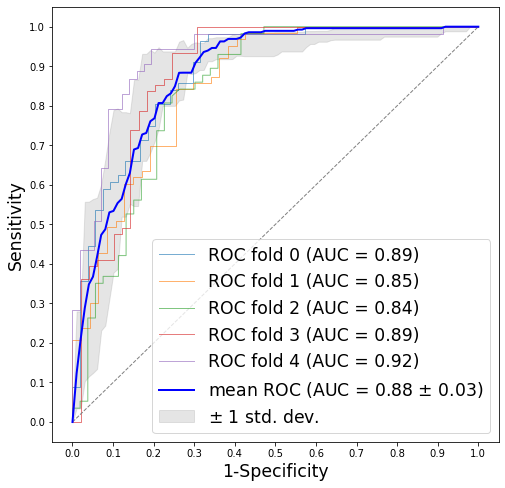

In [41]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1, y1):
    probas_ = model.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

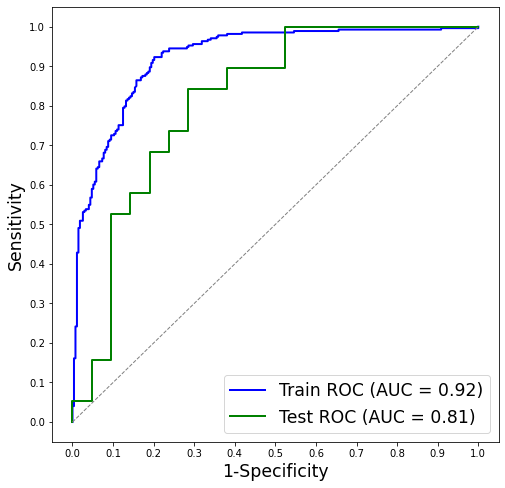

In [42]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('3DFS-6.jpg',dpi=1200)
plt.show()

In [43]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['3yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,40,42
1,22,231


In [44]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['3yDFS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,13,3
1,8,16


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.8443223443223443
Precision =  0.843065693430657
Recall =  0.8461538461538461
F1 Score =  0.8446069469835467


In [46]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.725
Precision =  0.6666666666666666
Recall =  0.8421052631578947
F1 Score =  0.744186046511628


In [47]:
predictions = model.predict_proba(X1)
predictions

array([[0.74138669, 0.25861331],
       [0.81007347, 0.18992653],
       [0.17507548, 0.82492452],
       ...,
       [0.85815681, 0.14184319],
       [0.83318166, 0.16681834],
       [0.86296738, 0.13703262]])

In [48]:
predictions1 = model.predict_proba(X3)
predictions1

array([[0.57226166, 0.42773834],
       [0.59192768, 0.40807232],
       [0.37332031, 0.62667969],
       [0.15632933, 0.84367067],
       [0.20606369, 0.79393631],
       [0.26740546, 0.73259454],
       [0.50563263, 0.49436737],
       [0.32673491, 0.67326509],
       [0.19311214, 0.80688786],
       [0.1304108 , 0.8695892 ],
       [0.21180611, 0.78819389],
       [0.39965032, 0.60034968],
       [0.07846115, 0.92153885],
       [0.33312559, 0.66687441],
       [0.20727066, 0.79272934],
       [0.21315253, 0.78684747],
       [0.22537437, 0.77462563],
       [0.3674347 , 0.6325653 ],
       [0.21689744, 0.78310256],
       [0.37573524, 0.62426476],
       [0.64265155, 0.35734845],
       [0.34540164, 0.65459836],
       [0.79538003, 0.20461997],
       [0.30080683, 0.69919317],
       [0.81516363, 0.18483637],
       [0.46472875, 0.53527125],
       [0.55188395, 0.44811605],
       [0.79636109, 0.20363891],
       [0.63085759, 0.36914241],
       [0.61336239, 0.38663761],
       [0.

In [49]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('3DFS-RTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [50]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('3DFS-RTest.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 